In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
train = pd.read_csv("fashion-mnist_train.csv")
test = pd.read_csv("fashion-mnist_test.csv")

In [13]:
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Preprocess data
train_labels = train['label'].values.reshape(-1, 1)
train_images = train.drop('label', axis=1).values / 255.0

test_labels = test['label'].values.reshape(-1, 1)
test_images = test.drop('label', axis=1).values / 255.0



# Define neural network architecture
input_size = 784
hidden_size = 256
output_size = 10



# Initialize weights and biases
W1 = np.random.randn(input_size, hidden_size) * 0.01
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size) * 0.01
b2 = np.zeros((1, output_size))

# Define activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define loss function
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

def cross_entropy_loss(y_hat, y):
    m = y_hat.shape[0]
    loss = -np.sum(np.log(y_hat[np.arange(m), y.flatten()])) / m
    return loss

# Define hyperparameters
learning_rate = 0.1
num_epochs = 50
batch_size = 128
num_batches = train_images.shape[0] // batch_size

# Training loop
for epoch in range(num_epochs):
    for batch in range(num_batches):
        # Get batch of images and labels
        batch_images = train_images[batch*batch_size:(batch+1)*batch_size]
        batch_labels = train_labels[batch*batch_size:(batch+1)*batch_size]
        
        # Forward propagation
        Z1 = np.dot(batch_images, W1) + b1
        A1 = sigmoid(Z1)
        Z2 = np.dot(A1, W2) + b2
        A2 = softmax(Z2)
        
        # Compute loss and accuracy
        loss = cross_entropy_loss(A2, batch_labels)
        accuracy = np.mean(np.argmax(A2, axis=1).reshape(-1, 1) == batch_labels)
        
        # Backward propagation
        dZ2 = A2 - (batch_labels == np.arange(output_size))
        dW2 = np.dot(A1.T, dZ2) / batch_size
        db2 = np.sum(dZ2, axis=0, keepdims=True) / batch_size
        dA1 = np.dot(dZ2, W2.T)
        dZ1 = dA1 * A1 * (1 - A1)
        dW1 = np.dot(batch_images.T, dZ1) / batch_size
        db1 = np.sum(dZ1, axis=0, keepdims=True) / batch_size
        
        # Update weights and biases
        W2 -= learning_rate * dW2
        b2 -= learning_rate * db2
        W1 -= learning_rate * dW1
        b1 -= learning_rate * db1
        
    # Print progress
    print(f'Epoch {epoch+1}/{num_epochs}, loss={loss:.4f}, accuracy={accuracy:.4f}')

Epoch 1/50, loss=0.8682, accuracy=0.7031
Epoch 2/50, loss=0.6862, accuracy=0.7188
Epoch 3/50, loss=0.6139, accuracy=0.7734
Epoch 4/50, loss=0.5655, accuracy=0.7812
Epoch 5/50, loss=0.5311, accuracy=0.7969
Epoch 6/50, loss=0.5072, accuracy=0.7812
Epoch 7/50, loss=0.4913, accuracy=0.8047
Epoch 8/50, loss=0.4805, accuracy=0.8047
Epoch 9/50, loss=0.4727, accuracy=0.8203
Epoch 10/50, loss=0.4664, accuracy=0.8203
Epoch 11/50, loss=0.4609, accuracy=0.8203
Epoch 12/50, loss=0.4558, accuracy=0.8125
Epoch 13/50, loss=0.4508, accuracy=0.8203
Epoch 14/50, loss=0.4460, accuracy=0.8203
Epoch 15/50, loss=0.4413, accuracy=0.8281
Epoch 16/50, loss=0.4367, accuracy=0.8281
Epoch 17/50, loss=0.4322, accuracy=0.8281
Epoch 18/50, loss=0.4279, accuracy=0.8281
Epoch 19/50, loss=0.4236, accuracy=0.8281
Epoch 20/50, loss=0.4195, accuracy=0.8359
Epoch 21/50, loss=0.4154, accuracy=0.8359
Epoch 22/50, loss=0.4115, accuracy=0.8359
Epoch 23/50, loss=0.4076, accuracy=0.8359
Epoch 24/50, loss=0.4038, accuracy=0.8359
E

In [15]:
np.save('W1.npy', W1)
np.save('b1.npy', b1)
np.save('W2.npy', W2)
np.save('b2.npy', b2)


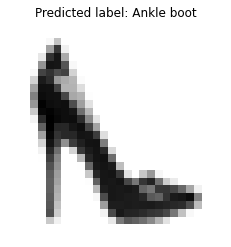

In [16]:
from PIL import Image

# Load the image
image = Image.open('heels_jpeg.jpg').convert('L')
image = image.resize((28, 28))
image_array = np.array(image) / 255.0
image_array = image_array.reshape(1, -1)

label_map = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Define a function to predict the label
def predict(image_array, W1, b1, W2, b2):
    Z1 = np.dot(image_array, W1) + b1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = softmax(Z2)
    return label_map[np.argmax(A2)]

# Load the trained weights and biases
W1 = np.load('W1.npy')
b1 = np.load('b1.npy')
W2 = np.load('W2.npy')
b2 = np.load('b2.npy')

# Make the prediction
label = predict(image_array, W1, b1, W2, b2)

# Show the image and predicted label
plt.imshow(image, cmap='gray')
plt.title(f'Predicted label: {label}')
plt.axis('off')
plt.show()